In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.svm as svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [52]:
data = pd.read_csv("C:/Dry_Bean_Dataset.csv")

In [53]:
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [55]:
data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

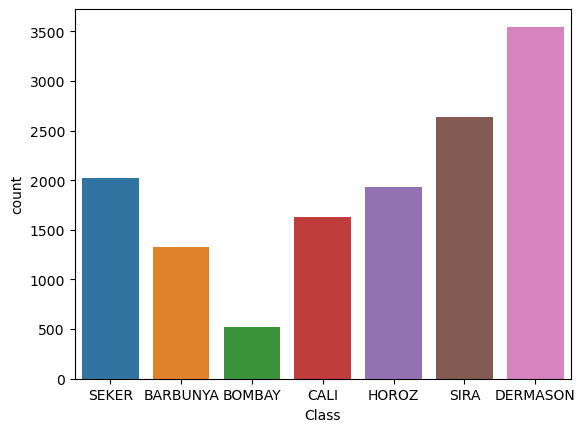

In [56]:
sns.countplot(data = data, x="Class")

plt.show()

In [57]:
data['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [58]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [59]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data.columns:
    data[i]=le.fit_transform(data[i])

Y = pd.get_dummies(y).values

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [60]:
X

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [61]:
Y

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [62]:
print("X_train.shape:", X_train.shape)

print("y_train.shape:", y_train.shape)

print("X_test.shape:", X_test.shape)

print("y_test.shape:", y_test.shape)

X_train.shape: (10888, 16)
y_train.shape: (10888, 7)
X_test.shape: (2723, 16)
y_test.shape: (2723, 7)


In [63]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD,Adam

In [66]:
def build_model(): 
    model = models.Sequential()
    model.add(layers.Dense(64, activation='ReLU', input_shape=(16,)))
    model.add(layers.Dense(32, activation='ReLU'))
    model.add(layers.Dense(16, activation='ReLU'))
    model.add(layers.Dense(7, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.04), metrics=['accuracy'])
    
    return model


model = build_model() 

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                1088      
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dense_18 (Dense)            (None, 16)                528       
                                                                 
 dense_19 (Dense)            (None, 7)                 119       
                                                                 
Total params: 3,815
Trainable params: 3,815
Non-trainable params: 0
_________________________________________________________________


In [67]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
341/341 [==============================] - 2s 3ms/step - loss: 116.3296 - accuracy: 0.2447 - val_loss: 1.8266 - val_accuracy: 0.2699
Epoch 2/100
341/341 [==============================] - 1s 2ms/step - loss: 1.8407 - accuracy: 0.2582 - val_loss: 1.8249 - val_accuracy: 0.2699
Epoch 3/100
341/341 [==============================] - 1s 2ms/step - loss: 1.8403 - accuracy: 0.2570 - val_loss: 1.8384 - val_accuracy: 0.1928
Epoch 4/100
341/341 [==============================] - 1s 2ms/step - loss: 1.8407 - accuracy: 0.2564 - val_loss: 1.8255 - val_accuracy: 0.2699
Epoch 5/100
341/341 [==============================] - 1s 3ms/step - loss: 1.8407 - accuracy: 0.2582 - val_loss: 1.8302 - val_accuracy: 0.2699
Epoch 6/100
341/341 [==============================] - 1s 2ms/step - loss: 1.8415 - accuracy: 0.2582 - val_loss: 1.8287 - val_accuracy: 0.2699
Epoch 7/100
341/341 [==============================] - 1s 2ms/step - loss: 1.8418 - accuracy: 0.2573 - val_loss: 1.8343 - val_accuracy: 0.19

Epoch 58/100
341/341 [==============================] - 1s 2ms/step - loss: 1.8422 - accuracy: 0.2582 - val_loss: 1.8305 - val_accuracy: 0.2699
Epoch 59/100
341/341 [==============================] - 1s 2ms/step - loss: 1.8411 - accuracy: 0.2582 - val_loss: 1.8254 - val_accuracy: 0.2699
Epoch 60/100
341/341 [==============================] - 1s 2ms/step - loss: 1.8412 - accuracy: 0.2556 - val_loss: 1.8254 - val_accuracy: 0.2699
Epoch 61/100
341/341 [==============================] - 1s 2ms/step - loss: 1.8408 - accuracy: 0.2582 - val_loss: 1.8332 - val_accuracy: 0.2699
Epoch 62/100
341/341 [==============================] - 1s 2ms/step - loss: 1.8413 - accuracy: 0.2582 - val_loss: 1.8309 - val_accuracy: 0.2699
Epoch 63/100
341/341 [==============================] - 1s 2ms/step - loss: 1.8416 - accuracy: 0.2582 - val_loss: 1.8239 - val_accuracy: 0.2699
Epoch 64/100
341/341 [==============================] - 1s 2ms/step - loss: 1.8415 - accuracy: 0.2582 - val_loss: 1.8290 - val_accuracy:

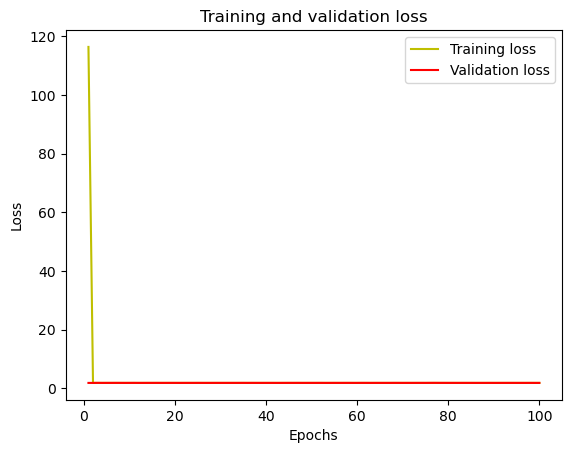

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

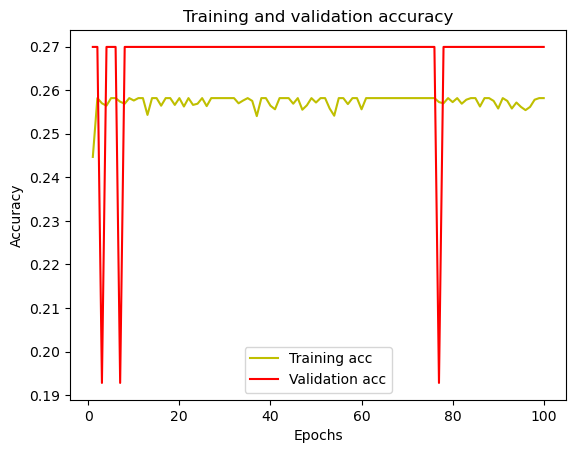

In [69]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [70]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       255
           1       0.00      0.00      0.00        92
           2       0.00      0.00      0.00       350
           3       0.27      1.00      0.43       735
           4       0.00      0.00      0.00       390
           5       0.00      0.00      0.00       376
           6       0.00      0.00      0.00       525

    accuracy                           0.27      2723
   macro avg       0.04      0.14      0.06      2723
weighted avg       0.07      0.27      0.11      2723

[[  0   0   0 255   0   0   0]
 [  0   0   0  92   0   0   0]
 [  0   0   0 350   0   0   0]
 [  0   0   0 735   0   0   0]
 [  0   0   0 390   0   0   0]
 [  0   0   0 376   0   0   0]
 [  0   0   0 525   0   0   0]]


C:\Users\82109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\82109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\82109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
